In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

## 1.  Data Ingestion - Import the Titanic Dataset

In [5]:
titanic_df = pd.read_csv('titanic_train.csv')

In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
## Data Description
### PassengerId
### Survived                      - Passenger Survived or not - 0 - Passenger Survived 1 Passenger Did not Survive
### pclass                        - 1,2,3 class
### Name                          - Name of the Passenger
### Sex                           - Gender of Passenger
### Age                           - Age of Passenger
### SibSp                         - no of sibling ,spouse travelling with passenger
### Parch                         - No of family members accompanying the passenger who is oether parent or child  \

### Ticket                        - Ticket No
### Fare                          - Ticket Value
### Cabin                         - Cabni number
### Embarked                      - Port in which Passenger Embarked

## 2. Data Exploration - Profile the Data

In [8]:
## check top 5 and bottom 5 records

In [9]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [11]:

### summary statistics

In [12]:
titanic_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Shellard, Mr. Frederick William",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Observations from Summary Statistics
 
- PassengerId is just an identifier ...no insights
- Survived/are binary classes (Even though they are numeric)
- Sibsp/Parch - min 0 family members and max of 6 family members accompanying the passenger
- age - avg age is 29.7, max age is 80, min is .42 (baby), quartile1 - lower 25% avg age is 20.12, q3-upper 25% avg age is 38. - indicates various age groups travelled
- Fare- max fare is 512 and min fare is 0 
- Average fare is 31, while avg in quartile 1 is 7.9 and quartile3 is 31

### columns Age, Cabin, Embarked has missing values

In [13]:
### to find number of missing values with each column
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### Uni Variate Analysis
 - Profile Individual Columns
 

### 2.1 Profile SibSp and Parch
 - SibSp and Parch are numeric or quantitative variables
 - SibSp gives us information about Siblings/Spouse that travelled
 - Parch gives us information about Parents/Child that travelled with Passenger

In [14]:
## Minimum Parch
print('Minimum number of parent or child travelled with a passenger ', titanic_df['Parch'].min())

## Maximum Parch
print('\n')
print('Maximum number of parent or child travelled with a passenger ', titanic_df['Parch'].max())

### 
## value counts Parch
print('\n')
print('Number of passengers travelled with different number of parent or child ', titanic_df['Parch'].value_counts().sort_values())

## Standard Deviation and Variance
print('\n')
print('Std deviation of passengers travelled with Parch ', titanic_df['Parch'].std())

##  
print('\n')
print('Std deviation of passengers travelled with Parch ', titanic_df['Parch'].var())


Minimum number of parent or child travelled with a passenger  0


Maximum number of parent or child travelled with a passenger  6


Number of passengers travelled with different number of parent or child  6      1
4      4
5      5
3      5
2     80
1    118
0    678
Name: Parch, dtype: int64


Std deviation of passengers travelled with Parch  0.8060572211299559


Std deviation of passengers travelled with Parch  0.6497282437357467


In [15]:
## Minimum SibSp
print('Minimum number of Sibling or Spouse travelled with a passenger ', titanic_df['SibSp'].min())

## Maximum SibSp
print('\n')
print('Maximum number of Sibling or Spouse travelled with a passenger ', titanic_df['SibSp'].max())

### 
## value counts Parch
print('\n')
print('Number of passengers travelled with different number of Sibling or Spouse ', titanic_df['SibSp'].value_counts().sort_values())

## Standard Deviation and Variance
print('\n')
print('Std deviation of passengers travelled with Sib or Spouse ', titanic_df['SibSp'].std())

##  
print('\n')
print('Std deviation of passengers travelled with Sib or spouse ', titanic_df['SibSp'].var())


Minimum number of Sibling or Spouse travelled with a passenger  0


Maximum number of Sibling or Spouse travelled with a passenger  8


Number of passengers travelled with different number of Sibling or Spouse  5      5
8      7
3     16
4     18
2     28
1    209
0    608
Name: SibSp, dtype: int64


Std deviation of passengers travelled with Sib or Spouse  1.1027434322934275


Std deviation of passengers travelled with Sib or spouse  1.2160430774662894


In [16]:
### find out the number of passengers that travelled either with more than 0 parent or child 
titanic_df[(titanic_df['Parch'] >0)].shape

## 213 passengers travelling with more than 0 parent or child

(213, 12)

In [17]:
### find out the number of passengers that travelled either with more than 0 sibling or spouse

titanic_df[(titanic_df['SibSp'] >0)].shape

## 283 passengers travelling with more than 0 sibling or spouse

(283, 12)

In [18]:
### find out the number of passengers that travelled with a parent or a child but with no sibling or spouse
### 0 sib or spouse

titanic_df[(titanic_df['Parch'] > 0) & (titanic_df['SibSp'] == 0)].shape

(71, 12)

In [19]:
### find out the number of passengers that travelled either with   no parent or child but travelled with a sibling or spouse
###  
titanic_df[(titanic_df['Parch'] == 0) & (titanic_df['SibSp'] > 0)].shape

(141, 12)

In [20]:
### find out the number of passengers that travelled either with at least 1 parent or child and 1 sibling or spouse

titanic_df[(titanic_df['Parch'] >= 1) & (titanic_df['SibSp'] >= 1)].shape

(142, 12)

In [21]:
### find out the number of female passengers who travelled with at least 1 or more parent or child

titanic_df[(titanic_df['Parch'] >=1) & (titanic_df['Sex'] == 'female')].shape

(120, 12)

In [22]:
### find out the number of male passengers who travelled with at least 1 or more parent or child
titanic_df[(titanic_df['Parch'] >0) & (titanic_df['Sex'] == 'male')].shape

(93, 12)

In [23]:
### find out the number of female passengers and also  travelled either with 1 or more  sibling or spouse 
titanic_df[(titanic_df['SibSp'] >=1) & (titanic_df['Sex'] == 'female')].shape

(140, 12)

In [24]:
### find out the number of passengers who is a male and also  travelled either with more than 0 sibling or spouse 
titanic_df[(titanic_df['SibSp'] >0) & (titanic_df['Sex'] == 'male')].shape

(143, 12)

### 2.1 - Observations
  - Passengers travelled with a maximum of 6 family members who are either  parent or children
  - Passengers travelled with maximum of 8 family members who are either sibling or spouse
  - 209 passengeers travelled with at lest 1 Sibling/spouse
  - 118 passengers travelled with at least 1 Parent or Child
  - 678 passengeers travelled without a parent or a child
  - 608 passengers travelled without a sibling or spouse
  - 71 passengers had at least 1 or more Parent or child but 0 Sib or Spouse
  - 141 passengers had at least 1 or more Sibling or Spouse but 0 Parent or Child
  - 142 passengers had 1 or more sibling or  spouse and 1 or more  parent or child 
   

### 2.2 - Passenger Fare Analysis 



In [25]:
### Differnet Fare Values

In [26]:
titanic_df['Fare'].value_counts()

### 248 different fare values

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [27]:
 # - Passengers with zero Fare

In [28]:
titanic_df[titanic_df['Fare'] == 0] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [29]:
### total number of passengers whose fare is 0
titanic_df[titanic_df['Fare'] == 0].shape

(15, 12)

In [30]:
### Fares by Gender and Pclass

In [31]:
titanic_df.groupby("Sex")["Fare"].agg(["mean","max","min","sum","count"])

,mean,max,min,sum,count
Sex,,,,,
female,44.479818,512.3292,6.75,13966.6628,314
male,25.523893,512.3292,0.00,14727.2865,577


In [32]:
 titanic_df.groupby(["Sex","Pclass"])["Fare"].agg(["mean","max","min","sum","count"])

mean       max      min        sum  count
Sex    Pclass                                                 
female 1       106.125798  512.3292  25.9292  9975.8250     94
       2        21.970121   65.0000  10.5000  1669.7292     76
       3        16.118810   69.5500   6.7500  2321.1086    144
male   1        67.226127  512.3292   0.0000  8201.5875    122
       2        19.741782   73.5000   0.0000  2132.1125    108
       3        12.661633   69.5500   0.0000  4393.5865    347

In [33]:
 ### Excercise -please do Age Analysis in the afore mentioned ways

### Observation
- 15 passengers have paid 0 fares
- all of them are males
- out of 15, 8 passengers have NaN in age 
- some of the passengers have the same ticket number
- cabin numbers are missing as well
- only 1 passenger survvived out of 15
this could mean that the remaining 14 either entered illegally or there was no proper recording 

In [34]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 2.3 - Passenger Age  Analysis 
 - Age vs Sex Vs Pclass vs Fare

In [35]:
 titanic_df.groupby(["Sex","Pclass"])[["Age","Fare"]].agg(["mean","max","min","sum","count",'std'])

Age                                              Fare  \
                    mean   max   min      sum count        std        mean   
Sex    Pclass                                                                
female 1       34.611765  63.0  2.00  2942.00    85  13.612052  106.125798   
       2       28.722973  57.0  2.00  2125.50    74  12.872702   21.970121   
       3       21.750000  63.0  0.75  2218.50   102  12.729964   16.118810   
male   1       41.281386  80.0  0.92  4169.42   101  15.139570   67.226127   
       2       30.740707  70.0  0.67  3043.33    99  14.793894   19.741782   
       3       26.507589  74.0  0.42  6706.42   253  12.159514   12.661633   

                                                              
                    max      min        sum count        std  
Sex    Pclass                                                 
female 1       512.3292  25.9292  9975.8250    94  74.259988  
       2        65.0000  10.5000  1669.7292    76  10.891796  
       3        69.5500   6.7500  2321.1086   144  11.690314  
male   1       512.3292   0.0000  8201.5875   122  77.548021  
       2        73.5000   0.0000  2132.1125   108  14.922235  
       3        69.5500   0.0000  4393.5865   347  11.681696

In [36]:
## Check for children less than age 12
titanic_df[(titanic_df['Age'] >0) & (titanic_df['Age'] < 12)].shape

(68, 12)

In [37]:
## Check for children less than age 12 and females
titanic_df[(titanic_df['Age'] >0) & (titanic_df['Age'] < 12) & (titanic_df['Sex'] == 'female')].shape

(32, 12)

In [38]:
## Check for children less than age 12
titanic_df[(titanic_df['Age'] <=1) ].shape

(14, 12)

In [39]:
### using pandas cross tab
pd.crosstab(index=titanic_df['Sex'],columns=titanic_df['Age'] < 12)

Age,False,True
Sex,,
female,282,32
male,541,36


In [40]:
### sex vs pclass vs age < 12
pd.crosstab(index=[titanic_df['Sex'],titanic_df['Pclass']],columns=titanic_df['Age'] < 12)

Age            False  True 
Sex    Pclass              
female 1          93      1
       2          68      8
       3         121     23
male   1         119      3
       2          99      9
       3         323     24

In [41]:
### sex vs pclass vs age < 12
pd.crosstab(index=[titanic_df['Sex'],titanic_df['Pclass']],columns=[(titanic_df['Age'] < 12) & (titanic_df['Fare'] > 0)],margins=True)

col_0          False  True  All
Sex    Pclass                  
female 1          93     1   94
       2          68     8   76
       3         121    23  144
male   1         119     3  122
       2          99     9  108
       3         323    24  347
All              823    68  891

## Observation on "Age"
 - Average age of women travelling in all classes is  is lesser than men - could be an indication women travelled along with men
 - Ratio of women vs men travelling in passenger class 3 is way less than passenger class 2 and 1
   - pclass1  = .77
   - pclass2 = .70
   - pclass3 - .41
      indicating the the possibility that more single men travelled in pclass 3
  - nearly equal number of girls and boys under 12
  - 14 babies < = age 1
  

### Treating Missing Values

In [42]:
### Let us try creating a data frame with stats on missing data
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [43]:
percent_1 = titanic_df.isnull().sum()/titanic_df.isnull().count()*100
percent_1

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [44]:
 ### find missing values, sort them and save them 
total = titanic_df.isnull().sum().sort_values(ascending=False)

### get the percentage of what is missing 
percent_1 = titanic_df.isnull().sum()/titanic_df.isnull().count()*100

### round the percentage to 1 decimal, sort and save
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

### concatenate the output to a new dataframe with columns Total and %
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])

### Display a missing data dataframe
missing_data


,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


In [45]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

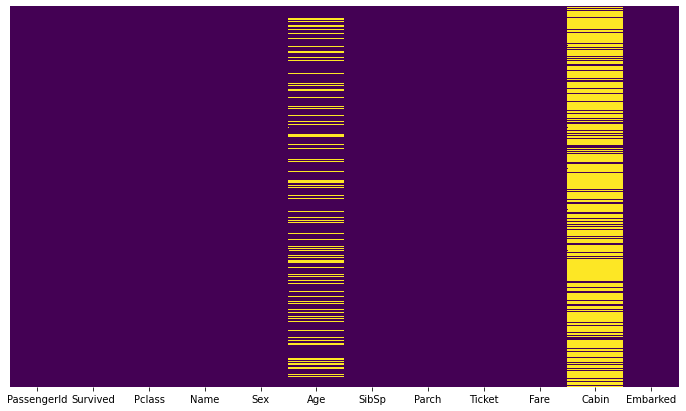

In [46]:
### use a heatmap to understand missing values
plt.figure(figsize=(12, 7))

sns.heatmap(titanic_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

- The Embarked feature has only 2 missing values, which can easily be filled. 
- It will be much more tricky, to deal with the ‘Age’ feature, which has 177 missing values. 
- The ‘Cabin’ feature needs further investigation, but it looks like that we might want to drop it from the dataset, since 77 % of it are missing.
- Roughly 20 percent of the Age data is missing. 
- The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. 
- Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"



In [47]:
print(titanic_df['Age'].max())
print(titanic_df['Age'].mean())
print(titanic_df['Age'].median())
print(titanic_df['Age'].min())
 

80.0
29.69911764705882
28.0
0.42


Treatment of missing values for numeric columns

 - impute (update) with valid business provided values
 - impute with mean() - 
 - impute with median() - 

## Treating Missing values in Age

  - one of the ways to treat missing values for numeric data is mean (after removing outliers)
 - another way is median 
 - instead of imputing with the avg age or median
   - we try to explore based on pclass and then impute age accordingly

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

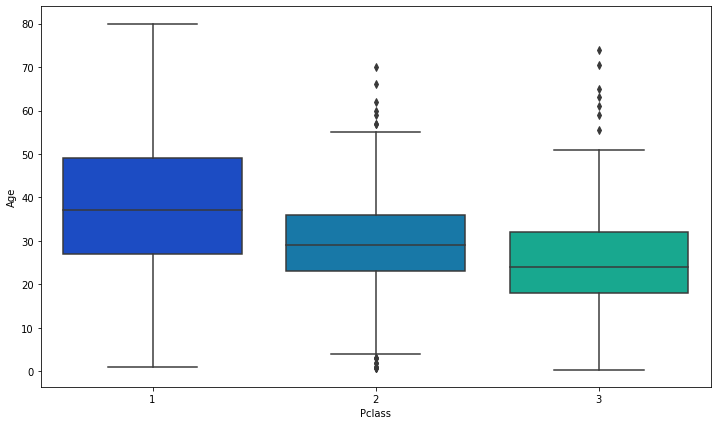

In [48]:
plt.figure(figsize=(12, 7))

sns.boxplot(x='Pclass',y='Age',data=titanic_df,palette='winter')

- wealthier passengers in the higher classes tend to be older, which makes sense. 
- We'll use these average age values to impute based on Pclass for Age.
- allows us to selectively impute

In [49]:
 titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [50]:
def impute_age(cols): ### cols is an argument that will take a list of items age and pclass
    Age = cols[0]
    Pclass = cols[1]
    
    ### check if that particular age is null or missing value
    if pd.isnull(Age):

        ### check if passenger class 1
        if Pclass == 1:
            ### mean age for passengers travelling in class 1
            return 37

        elif Pclass == 2:
            ### mean age for passengers travelling in class 2
            return 29

        else:
            ### mean age for passengers travelling in class 3
            return 24

    else:
        ### just return the Age that is in the dataset
        return Age

In [51]:
 ### axis=1 imputation needs to be for the column
titanic_df['Age'] = titanic_df[['Age','Pclass']].apply(impute_age,axis=1)

In [52]:
### check for missing values in age again - note that age got sorted out
titanic_df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

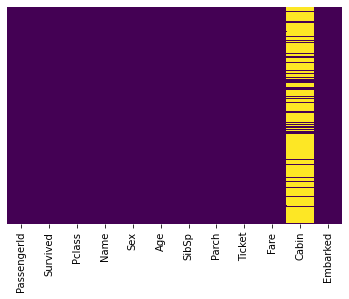

In [53]:
### check the heatmap again
sns.heatmap(titanic_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [54]:
###   drop cabin column

In [55]:
titanic_df.drop('Cabin',axis=1,inplace=True)

In [56]:
titanic_df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [57]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [58]:
titanic_df['Embarked'].mode()

0    S
dtype: object

In [59]:
### imputing missing values in embarked with highest occuring value

In [60]:
titanic_df=titanic_df.fillna({"Embarked":"S"})

In [61]:
titanic_df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [62]:
###### NOT A RECOMMENDED APPROACH == AS IT WILL REMOVE ALL COLUMNS WITH GOOD VALUES 


In [63]:
### since embarked has only 2 missing values, i chose to drop them
titanic_df.dropna(inplace=True)

In [64]:
titanic_df.isnull().sum()

### all missing values have been addressed

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [65]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.5+ KB


### Visualization approach
 - start with a write up on what you want to visualize
 - visualize everything that you already analysed with pandas
 - pictures tend to provide more insights

### Visualization Objective

Objective of Analysis via Visualization


    - Perform Bi-Variate Analysis to understand whether passengers travelled alone or with family
    - where did the passengers come from?
    - What age groups of passengers were travelling
    - what class of cabins where passengers travelling
    - where did the passengers come from , port of embarkment
    - what is the distribution of fares ?
    - how many passengers survived and died
    
    - Male vs Female survivors
    - Male vs Female survivors who either travelled with a spouse or sibling
    - male vs female survivors who either travelled with a parent or a child 
    - male vs female survivors vs passenger class
    - passengers class of travel vs Spouse or Sibling 
    - Passengers class of travel vs parent or child 
    - Passengers class vs fare 
   
   
    - Factors that helped a passenger survive
    
 

### 2.3 -  Finding the Passenger Profile

In [66]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [67]:
 ## Survived or Deceased

In [68]:
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [69]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [70]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Basic CountPlots 

- gives a visual representation of exact count of data points 
- better for easy understanding of data 
- gives insights very quickly
- allows for both univariate and bivariate analysis

In [71]:
### sets the size of the grid or canvas
sns.set(rc={'figure.figsize':(10,5)})


In [72]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

C:\Users\SupriyaGhodke\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

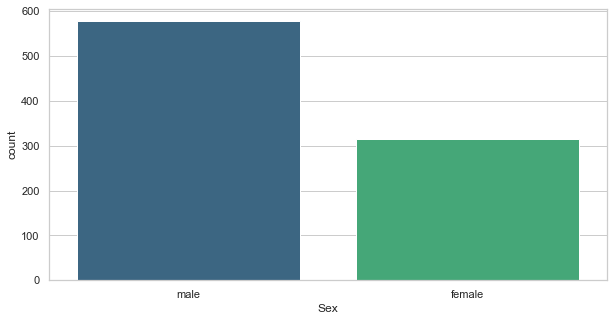

In [73]:
### Univariate analysis on Passenger Sex
### using a Count plot
sns.set_style('whitegrid') ### style or theme
sns.countplot('Sex',data=titanic_df,color='blue',palette='viridis')

### More men than women on titanic
### women nearly half as that of men
### Men included (babies,boys as well)

C:\Users\SupriyaGhodke\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

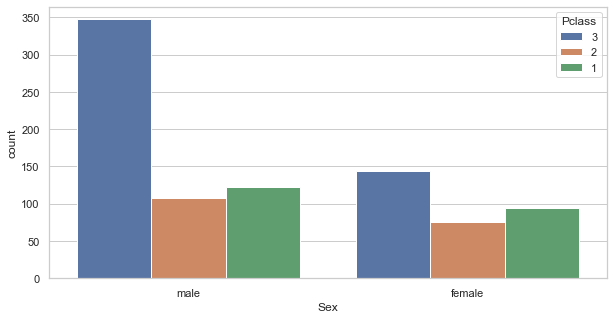

In [74]:
### Let us try to understand how men and women travelled in various passenger classes 
sns.set_style('whitegrid')
sns.countplot('Sex',data=titanic_df,hue='Pclass',hue_order=[3,2,1])


### we understand most of the men are in third class
### number of women in passenger class 3 is high

C:\Users\SupriyaGhodke\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

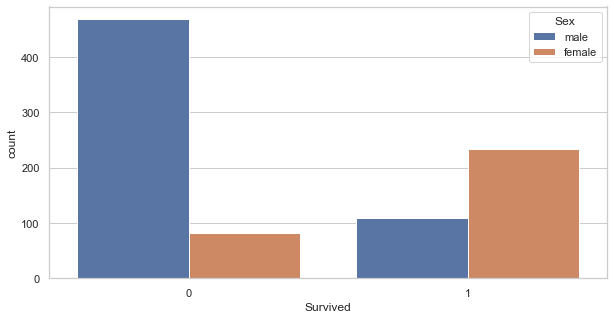

In [75]:
## to get more clarity on the above
### Let us try to understand how men and women travelled in various passenger classes 
sns.set_style('whitegrid')

sns.countplot('Survived',data=titanic_df,hue='Sex')


### mpw this is even more clear that more men travelling in class 3
### number of passengers travelling in first and second class is more or less the same

- it would be nice for us to understand , out of male and females, are there any children
- our dataset has only male and female in the column Sex
- We will create a new column which will clearly differentiate between a male, female and child 

- for this we will need to write a small function to idenitfy if a male or a female is a child



C:\Users\SupriyaGhodke\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parch', ylabel='count'>

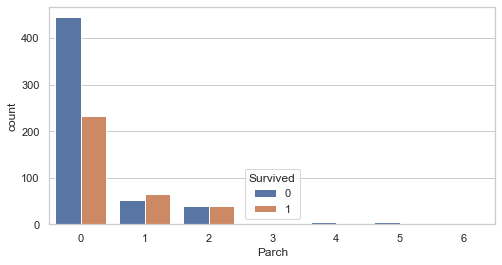

In [76]:
## Parent or child   vs Survived
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style('whitegrid')

sns.countplot('Parch',data=titanic_df,hue='Survived')


C:\Users\SupriyaGhodke\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp', ylabel='count'>

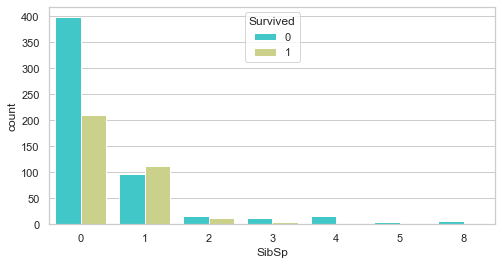

In [77]:
## SibSp class vs Survived
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style('whitegrid')
sns.countplot('SibSp',data=titanic_df,hue='Survived',palette='rainbow')


### DISTRIBUTION PLOTS
 - Do distribution plots on Age and Fare

C:\Users\SupriyaGhodke\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

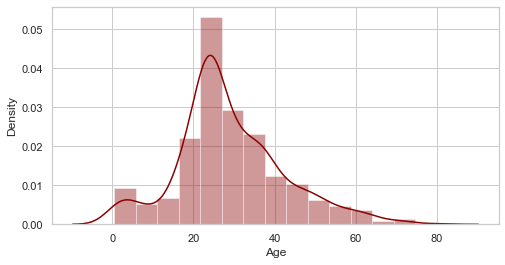

In [78]:
sns.distplot(titanic_df['Age'],kde=True,color='darkred',bins=15)

### kernel density estimator

C:\Users\SupriyaGhodke\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare'>

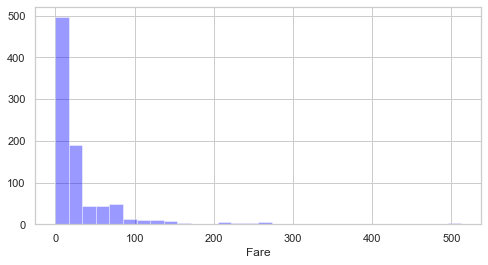

In [79]:
sns.distplot(titanic_df['Fare'].dropna(),kde=False,color='blue',bins=30)

In [80]:
### is there any relationship between Age and Sex

C:\Users\SupriyaGhodke\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SupriyaGhodke\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SupriyaGhodke\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

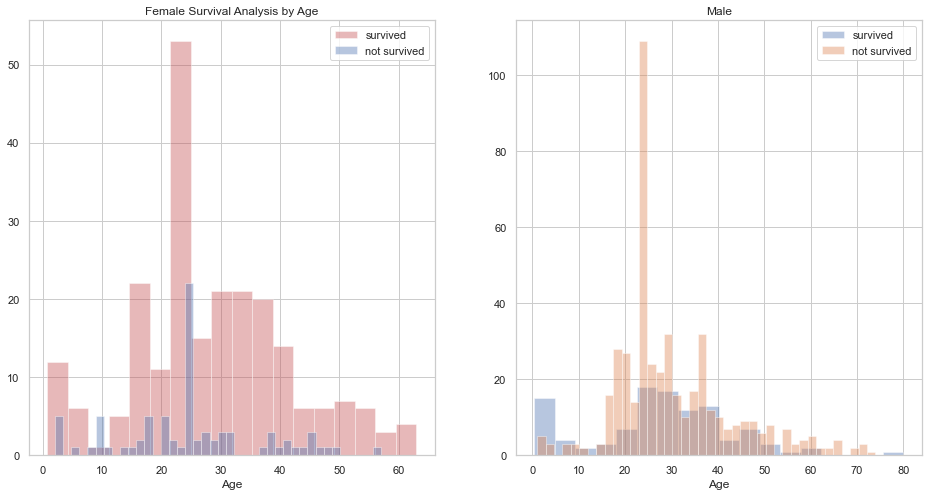

In [81]:
### create 2 string variables for survived and not survived
survived = 'survived'
not_survived = 'not survived'

### create a fig object using matplotlib
### nrows is number of rows of plots -- in our case 1
### ncols is number of columns of plots -- in our case 2
### figsize refers to the size of the figure 16 X 8
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 8))

### Creat a dataframe "women" with just female passengers
women = titanic_df[titanic_df['Sex']=='female']

### Creat a dataframe men with just male passengers
men = titanic_df[titanic_df['Sex']=='male']

### plot women survived data into histogram after dropping missing values
### plot women not survived data into histogram
### axes = 0 refers to first subplot - unique reference number we give
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0],color='r', kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female Survival Analysis by Age')


### plot men survived data into histogram after dropping missing values
### plot men not survived data into histogram
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')


In [82]:
### analysis between embarked , pclass and sex

C:\Users\SupriyaGhodke\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


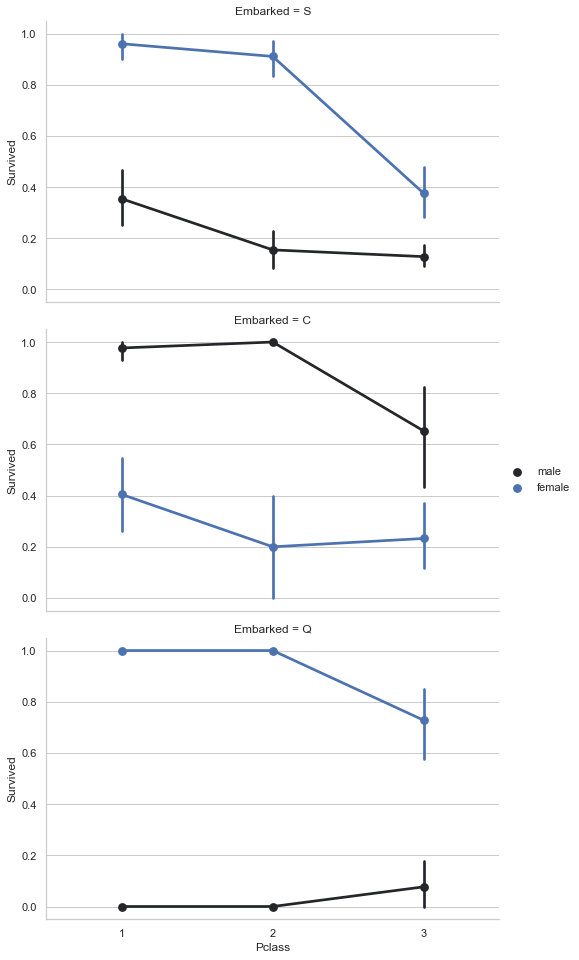

In [83]:
 FacetGrid = sns.FacetGrid(titanic_df, row='Embarked', size=4.5, aspect=1.6)

FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )

FacetGrid.add_legend()
plt.savefig('fig1.jpg')

In [84]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Feature Engineering
 - create a new column called person which differentiates between male,female and child


###to know whether a given passenger is a male, female or child


In [85]:
def person_classifier(x):
    ## assign the argument x to age and sex columns
    age,sex = x #[Age,Sex]
    
    ## if the value of age is <16, then declare the individual as a chile
    ## if the value of age is >16 then declare the individual's sex as it is
    if age < 16:
        return 'child'
    else:
        ## return the value in the field sex
        return sex

now we use this function in our titanic_df dataframe

In [86]:
### create a new column in titanic_df called "person" - it can take 3 values "Male"/"Female"/"Child"
### for creating person, we need 2 columns, Age and Sex from existing titanic_df dataset
### we will then use our "person_classifier" function to achieve our goal
### .apply function, easily runs the function against all the rows of titanic_df at one shot
### axis=1 tells us that .apply function will run on column axis

titanic_df['person'] = titanic_df[['Age','Sex']].apply(person_classifier,axis=1)

In [87]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,male


C:\Users\SupriyaGhodke\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='person', ylabel='count'>

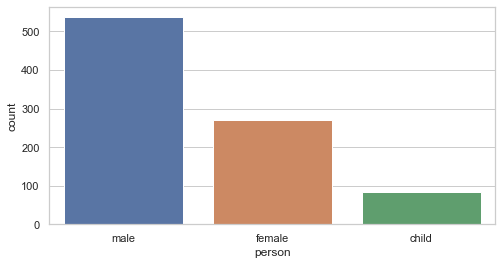

In [88]:
### No of male , female and children

sns.countplot(titanic_df['person'])

C:\Users\SupriyaGhodke\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='person', ylabel='count'>

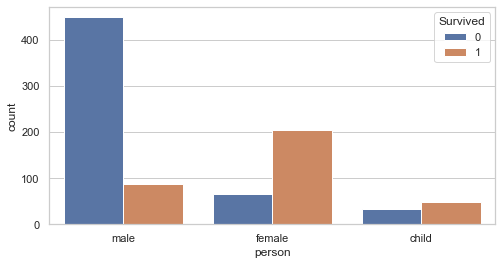

In [89]:
sns.countplot(titanic_df['person'],hue='Survived',data=titanic_df)

C:\Users\SupriyaGhodke\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

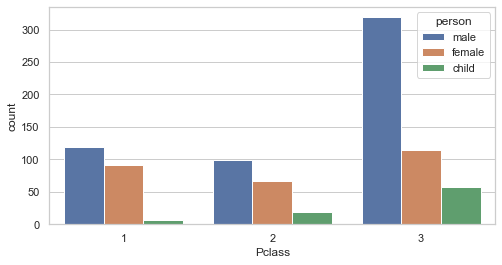

In [90]:
### now let us use a simple countplot to introduce the person column
sns.countplot('Pclass',data=titanic_df,hue='person')

### theree seems to be an even distribution of children between male and female

C:\Users\SupriyaGhodke\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='person', ylabel='count'>

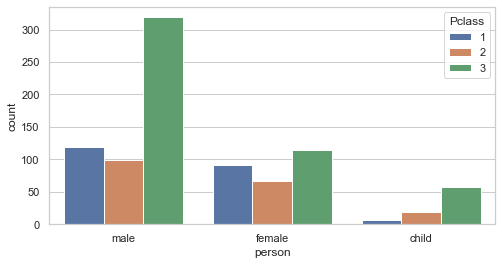

In [91]:
### now let us use a simple countplot to introduce the person column
sns.countplot('person',data=titanic_df,hue='Pclass')


C:\Users\SupriyaGhodke\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

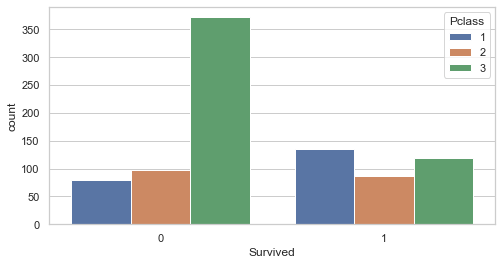

In [92]:
sns.countplot('Survived',data=titanic_df,hue='Pclass')


C:\Users\SupriyaGhodke\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

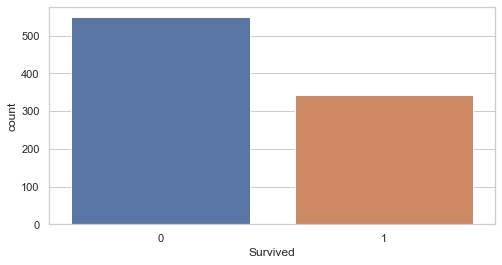

In [93]:
### how many survivors and non survivors
sns.countplot('Survived',data=titanic_df)

## more dead than survived

C:\Users\SupriyaGhodke\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

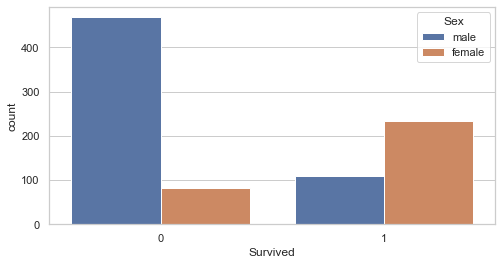

In [94]:
### how many survivors and non survivors
sns.countplot('Survived',data=titanic_df,hue='Sex')

C:\Users\SupriyaGhodke\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

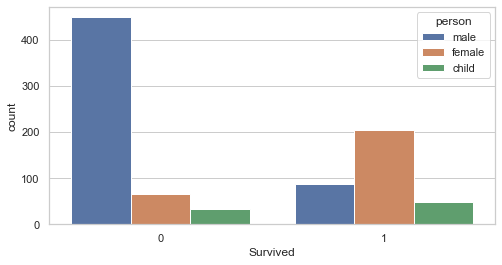

In [95]:
sns.countplot('Survived',data=titanic_df,hue='person')


### more children survived
### more men had died

C:\Users\SupriyaGhodke\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

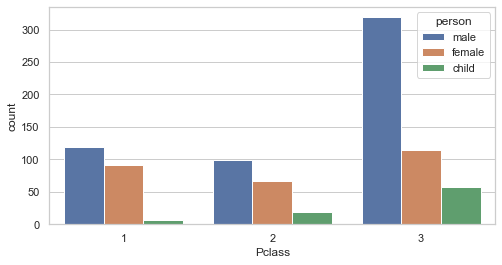

In [96]:
### now let us use a simple countplot to understand in what classes children travelled moree
 
sns.countplot('Pclass',data=titanic_df,hue='person')


### its clear that more children travelled in 2nd and 3rd class

C:\Users\SupriyaGhodke\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

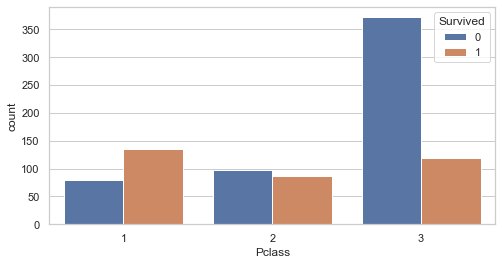

In [97]:
### To understand which class contributed to more surviving children
 
sns.countplot('Pclass',data=titanic_df,hue='Survived')

### we see that passenger class 3 has more passengers who did not survive.
### since passengere class 3 also has more children, we can assume that there are more children who lost their lives. 
### 

In [98]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,female


In [99]:
titanic_df['Age'].mean()

29.06640852974186

### BAR PLOTS
 - Uses bars to compare among data categories
 - can compare between a categorical and numerical variable/column
 - it represents the central tendency of numeric variable with the height of each rectange 
 - provides some indication of uncertainty around that estimate using the error bars
 - remember that barplots show only the mean value - (not always a great choice)
 - longer the bar greater its value
 

In [100]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.066409,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.244532,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [101]:
titanic_df['Age'].mean()

29.06640852974186

<AxesSubplot:xlabel='Sex', ylabel='Age'>

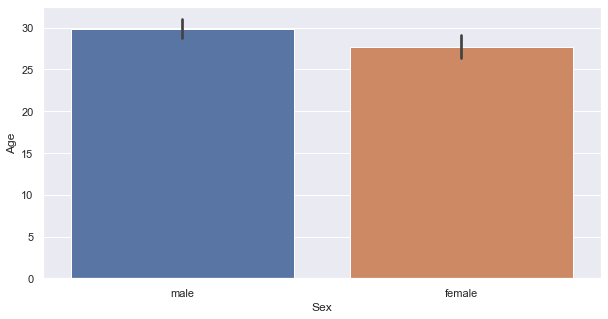

In [102]:
### relationship age vs sex

sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='Sex',y='Age',hue=None,data=titanic_df)


<AxesSubplot:xlabel='Sex', ylabel='Age'>

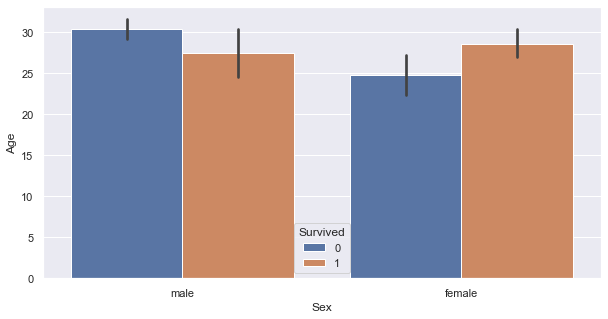

In [103]:
### relationship age vs sex

sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='Sex',y='Age',hue='Survived',data=titanic_df)


<AxesSubplot:xlabel='Sex', ylabel='Age'>

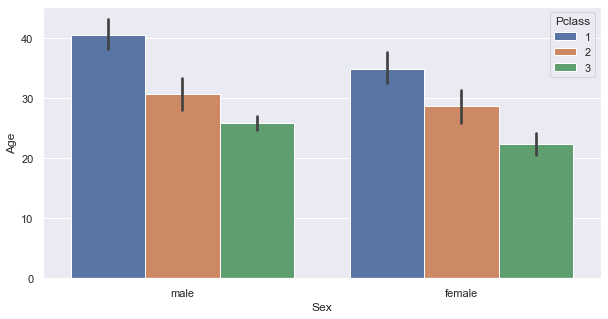

In [104]:
### relationship age vs sex
sns.barplot(x='Sex',y='Age',hue='Pclass',data=titanic_df)


<AxesSubplot:xlabel='Sex', ylabel='Age'>

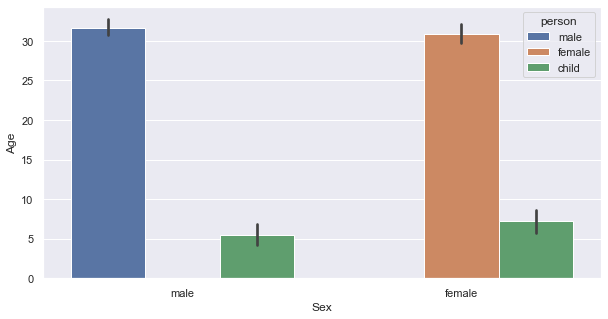

In [105]:
### relationship age vs sex
sns.barplot(x='Sex',y='Age',hue='person',data=titanic_df)


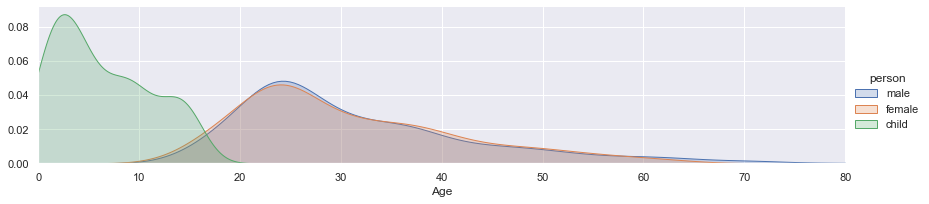

In [106]:
## using facet grid

## fig object was created using seaborn.FacetGrid
### hue= 'Sex'
fig = sns.FacetGrid(titanic_df,hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

### Set the max age to a column called Oldest
oldest = titanic_df['Age'].max()
fig.set(xlim = (0,oldest))

fig.add_legend()

C:\Users\SupriyaGhodke\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

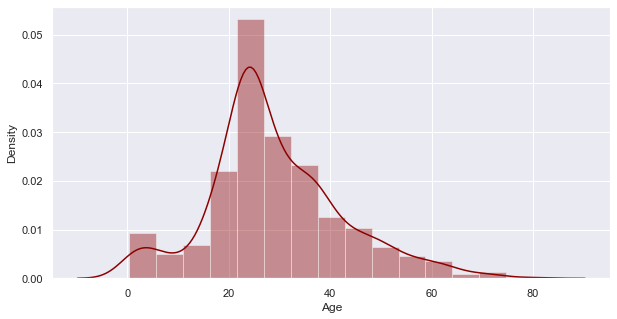

In [107]:
sns.distplot(titanic_df['Age'],hist=True,kde=True,color='darkred',bins=15)

### kernel density estimator

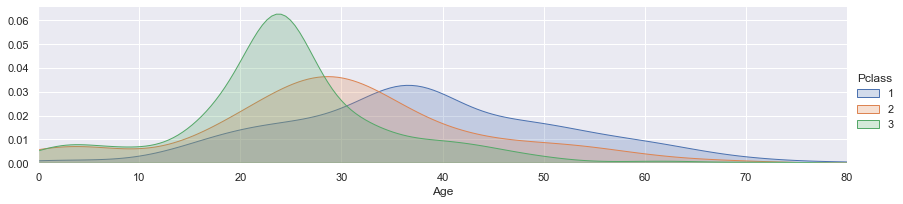

In [108]:
# fig object was created using seaborn.FacetGrid
### hue= 'passenger class
fig= sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
fig.add_legend()


### Set the max age to a column called Oldest
oldest = titanic_df['Age'].max()
fig.set(xlim = (0,oldest))


In [109]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
person         0
dtype: int64

### Boxplots
- better insights than a barplot as the data point distribution particularly for variables where 0 is not a meaningful value
- box plots are better in this case
- box plots also help with outliers 
- shows distribution of values
- allow for multivariate comparisons


In [110]:
### let us do a Age vs Sex 

<AxesSubplot:xlabel='Sex', ylabel='Age'>

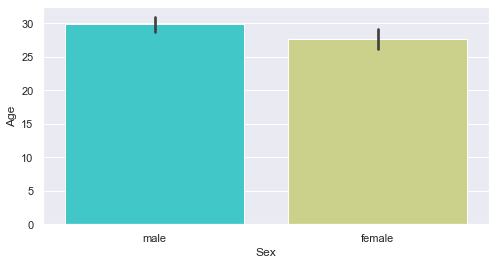

In [111]:
sns.set(rc={'figure.figsize':(8,4)})
sns.barplot(x="Sex", y="Age", data=titanic_df,palette='rainbow')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

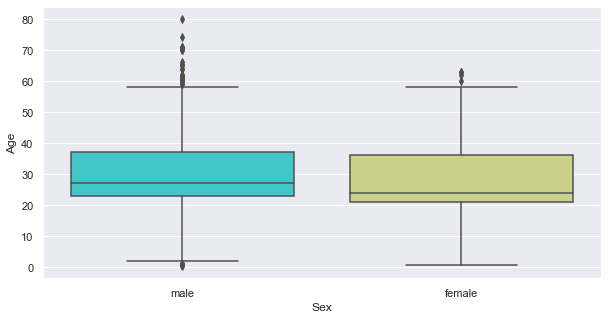

In [112]:
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(x="Sex", y="Age", data=titanic_df,palette='rainbow')

In [113]:
#### Male seems to have outlier ages
### median value of male and female seem to be same showing that the distribution of data might be similar 

<AxesSubplot:xlabel='Sex', ylabel='Age'>

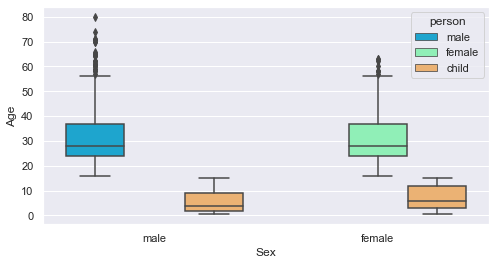

In [114]:
### Age vs Sex vs Person
sns.set(rc={'figure.figsize':(8,4)})
sns.boxplot(x="Sex", y="Age", hue='person',data=titanic_df,palette='rainbow')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

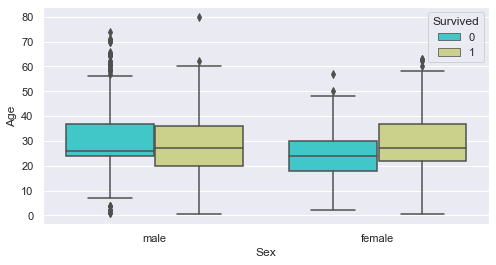

In [115]:
### Age vs Sex vs Person
sns.set(rc={'figure.figsize':(8,4)})
sns.boxplot(x="Sex", y="Age", hue='Survived',data=titanic_df,palette='rainbow')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

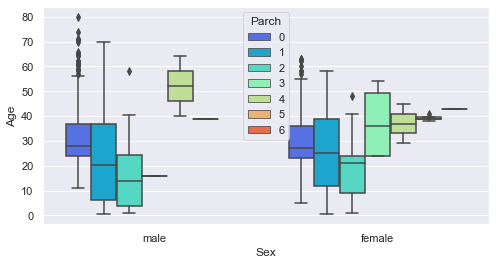

In [116]:
### Age vs Sex vs Parch
sns.set(rc={'figure.figsize':(8,4)})
sns.boxplot(x="Sex", y="Age", hue='Parch',data=titanic_df,palette='rainbow')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

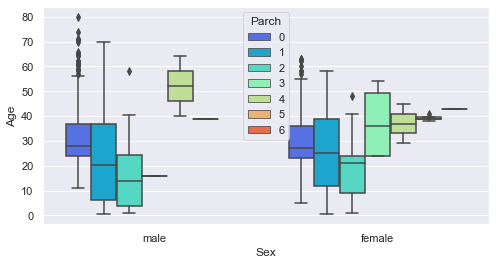

In [117]:
### Age vs Sex vs Sibsp
sns.set(rc={'figure.figsize':(8,4)})
sns.boxplot(x="Sex", y="Age", hue='Parch',data=titanic_df,palette='rainbow')

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

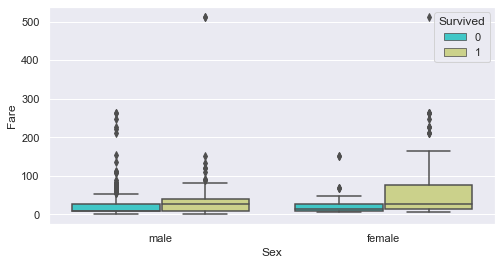

In [118]:
### Age vs Sex vs Sibsp
sns.set(rc={'figure.figsize':(8,4)})
sns.boxplot(x="Sex", y="Fare", hue='Survived',data=titanic_df,palette='rainbow')

### Strip Plots
 - bi variate analysis - numreic continuous vs categorical
 - allows to add a hue for multivariate analysis

C:\Users\SupriyaGhodke\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

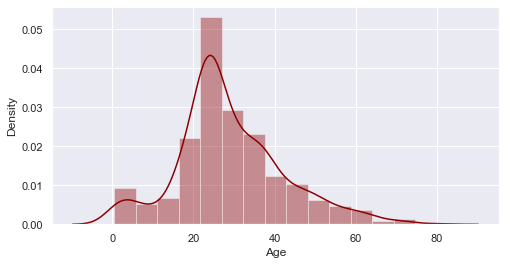

In [119]:
sns.distplot(titanic_df['Age'].dropna(),hist=True,kde=True,color='darkred',bins=15)


<AxesSubplot:xlabel='Sex', ylabel='Age'>

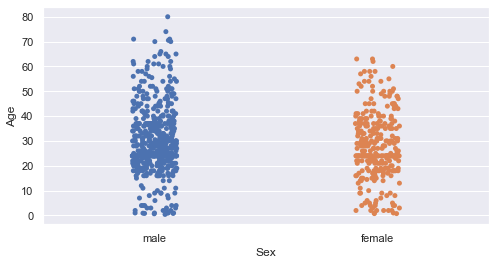

In [120]:
sns.stripplot(x="Sex", y="Age", data=titanic_df,jitter=True)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

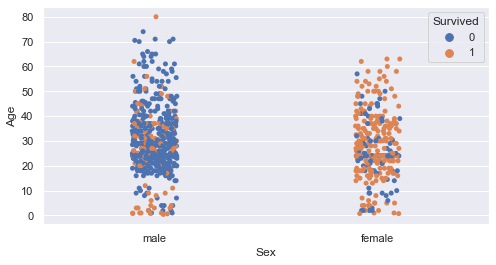

In [121]:
sns.stripplot(x="Sex", y="Age",hue='Survived', data=titanic_df)

<AxesSubplot:xlabel='Sex', ylabel='SibSp'>

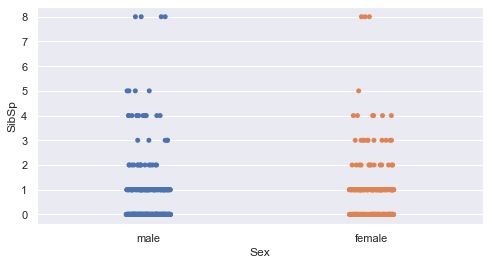

In [122]:
sns.stripplot(x="Sex", y="SibSp", data=titanic_df)

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

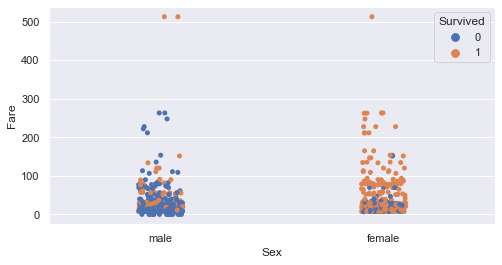

In [123]:
sns.stripplot(x="Sex", y="Fare",hue='Survived', data=titanic_df)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

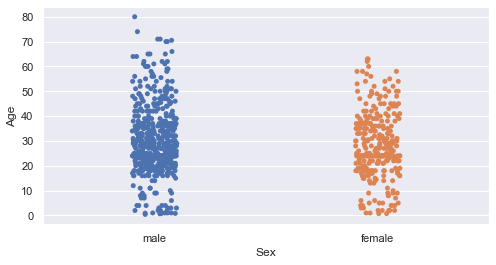

In [124]:
sns.stripplot(x="Sex", y="Age", data=titanic_df,jitter=True)

### Swarmplot
 - bi variate analysis - numreic continuous vs categorical
 - allows to add a hue for multivariate analysis

C:\Users\SupriyaGhodke\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\SupriyaGhodke\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Sex', ylabel='Age'>

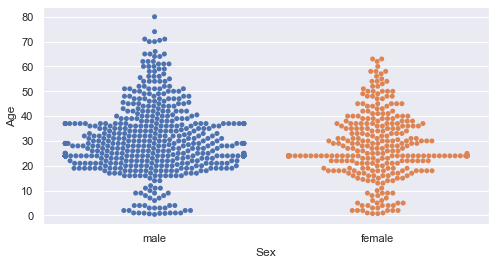

In [125]:
sns.swarmplot(x="Sex", y="Age", data=titanic_df)

C:\Users\SupriyaGhodke\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 80.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\SupriyaGhodke\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 66.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Sex', ylabel='SibSp'>

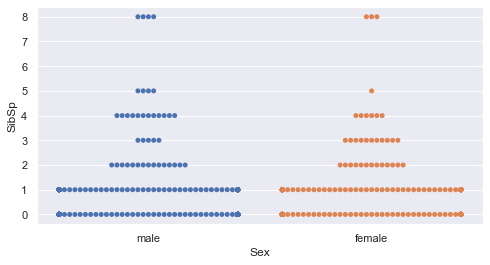

In [126]:
sns.swarmplot(x="Sex", y="SibSp", data=titanic_df)

C:\Users\SupriyaGhodke\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 65.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\SupriyaGhodke\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 42.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Sex', ylabel='Fare'>

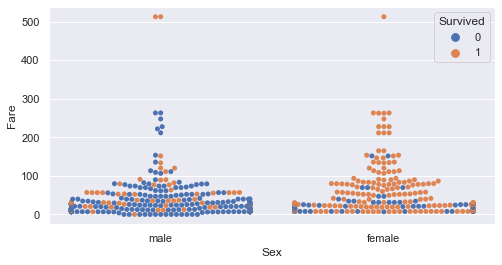

In [127]:
sns.swarmplot(x="Sex", y="Fare",hue='Survived', data=titanic_df)

<AxesSubplot:xlabel='Sex', ylabel='SibSp'>

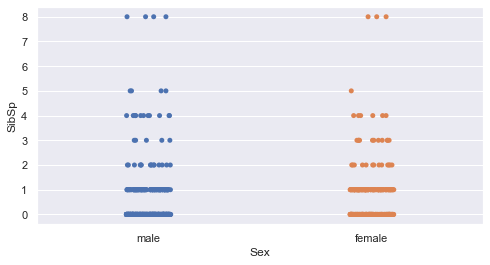

In [128]:
sns.stripplot(x="Sex", y="SibSp", data=titanic_df)

### Joint Plot
 - relationship between 2 numerical fields (age vs fare)
 - also shows the distribution of each numeric field separately

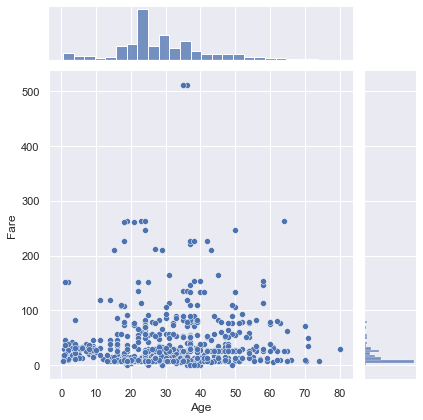

In [129]:
sns.jointplot(x='Age',y='Fare',data=titanic_df)


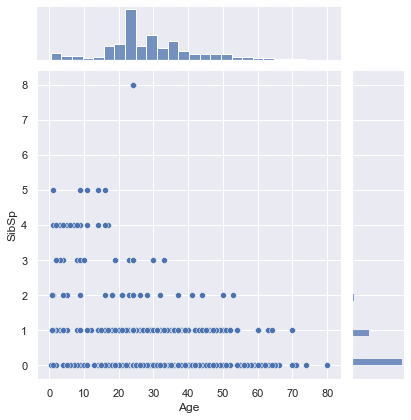

In [130]:
sns.jointplot(x='Age',y='SibSp',data=titanic_df)


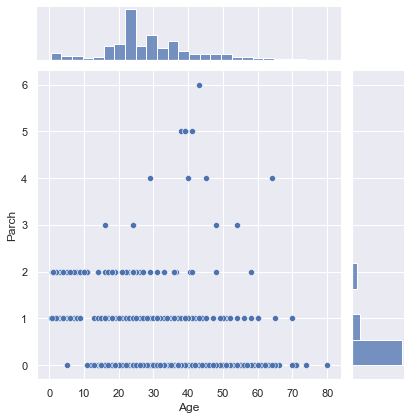

In [131]:
sns.jointplot(x='Age',y='Parch',data=titanic_df)


In [132]:
### Correlation

In [133]:
titanic_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.035840,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.047255,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.408487,0.083081,0.018443,-0.549500
Age,0.035840,-0.047255,-0.408487,1.000000,-0.243526,-0.171095,0.123784
SibSp,-0.057527,-0.035322,0.083081,-0.243526,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.171095,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.123784,0.159651,0.216225,1.000000


#### Linear Model Plot

In [134]:
# Y = MX + B + E

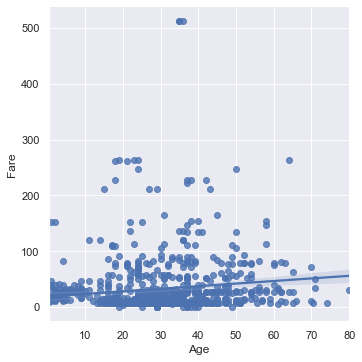

In [135]:
sns.lmplot(x='Age',y='Fare',hue=None,data=titanic_df)

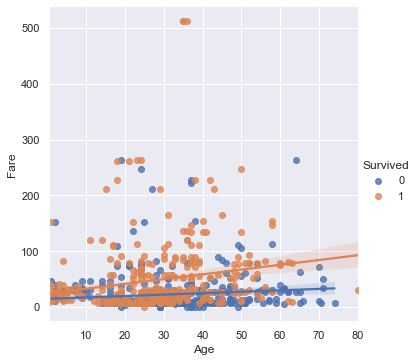

In [136]:
sns.lmplot(x='Age',y='Fare',hue='Survived',data=titanic_df)

In [137]:
### Heatmaps

In [138]:
titanic_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.035840,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.047255,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.408487,0.083081,0.018443,-0.549500
Age,0.035840,-0.047255,-0.408487,1.000000,-0.243526,-0.171095,0.123784
SibSp,-0.057527,-0.035322,0.083081,-0.243526,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.171095,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.123784,0.159651,0.216225,1.000000


<AxesSubplot:>

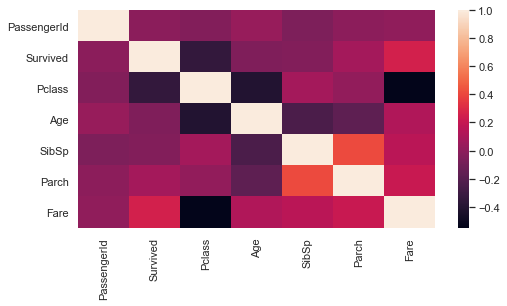

In [139]:
sns.heatmap(titanic_df.corr())

In [140]:
sns.set(rc={'figure.figsize':(15,8)})


<AxesSubplot:>

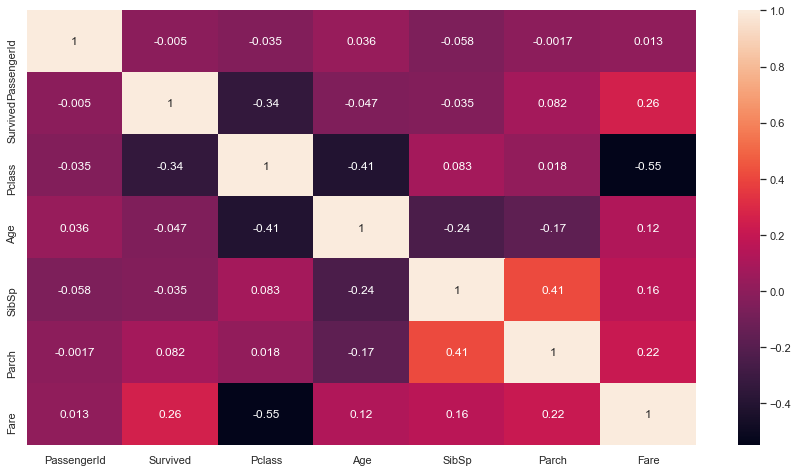

In [141]:
sns.heatmap(titanic_df.corr(),annot=True)

In [142]:
titanic_tst1 =  titanic_df.iloc[:,6:10]


In [143]:
titanic_tst1.head()

,SibSp,Parch,Ticket,Fare
0,1,0,A/5 21171,7.2500
1,1,0,PC 17599,71.2833
2,0,0,STON/O2. 3101282,7.9250
3,1,0,113803,53.1000
4,0,0,373450,8.0500


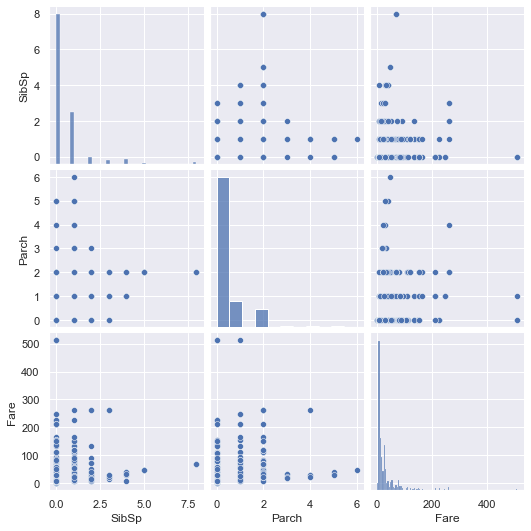

In [144]:
sns.pairplot(titanic_tst1)

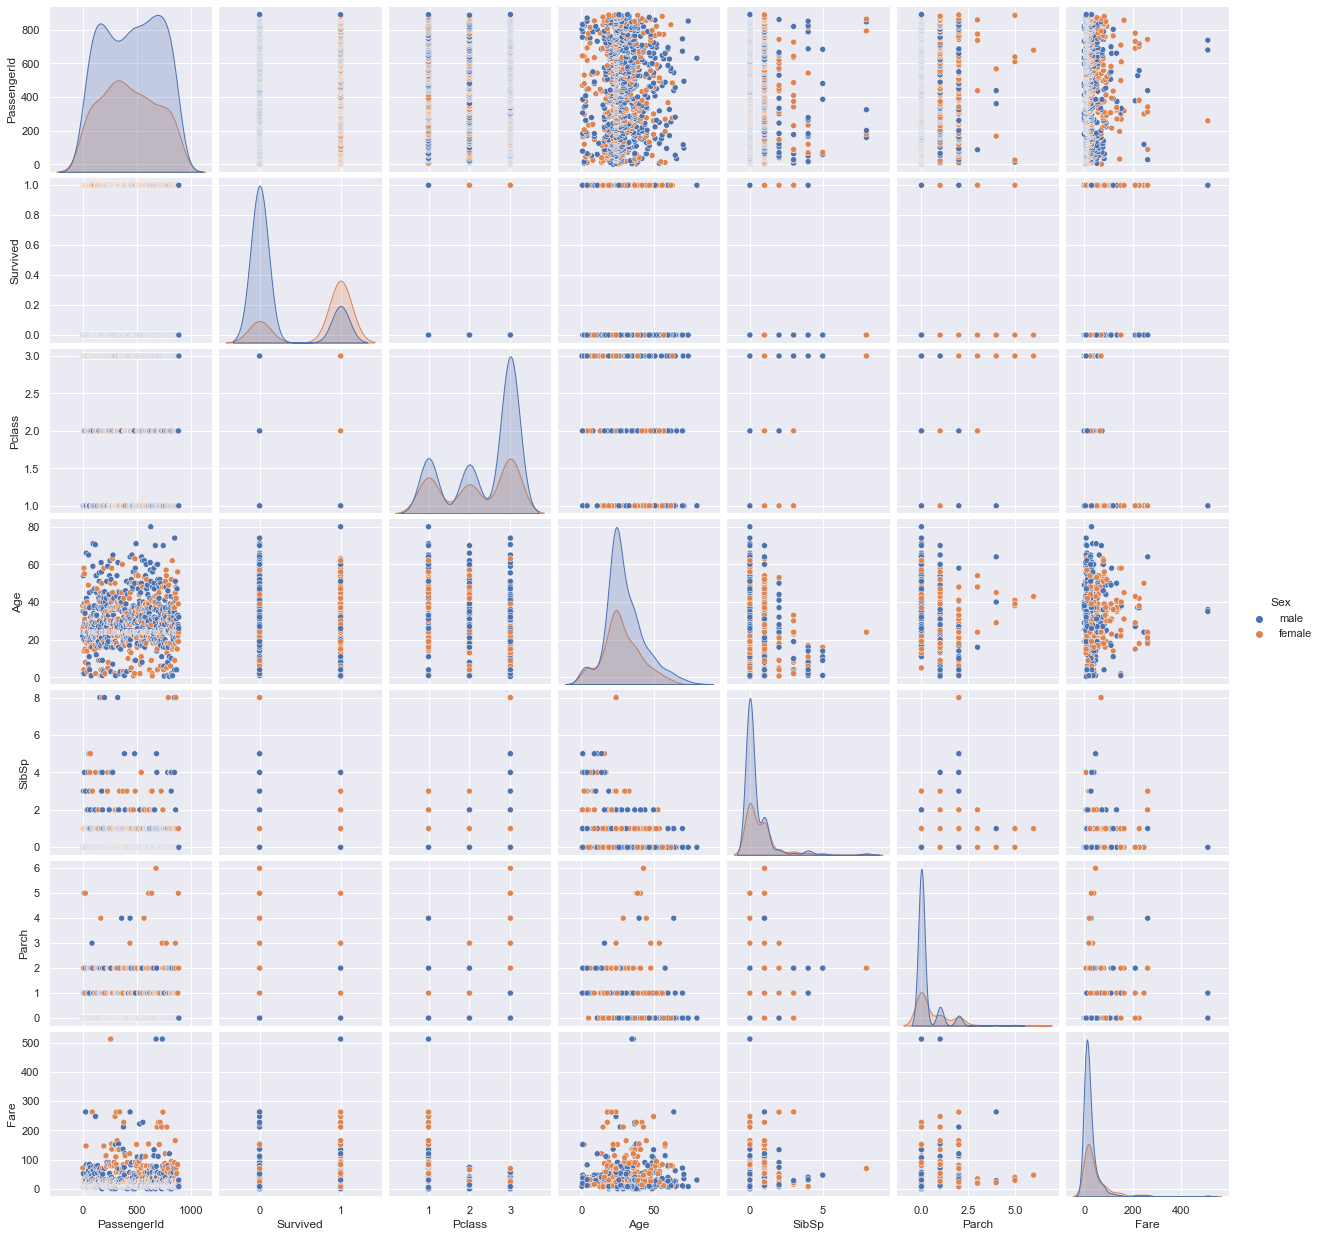

In [145]:
sns.pairplot(titanic_df,hue='Sex')

In [146]:
### check for missing values
titanic_df.isnull().sum()


### We see Age has 177 missing values 
### Cabin as 687 missing values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
person         0
dtype: int64